# Linear Regression 

In this example, we will learn how to train a very basic linear regression model with **scikit-learn**. <br/>
Furthermore, we will also practice analyzing data with Pandas.

#### Dataset: California Housing

As an example dataset we will use the California Housing dataset. The data contains information from the 1990 California census.  A description of this dataset can be found here: https://www.kaggle.com/datasets/camnugent/california-housing-prices

Fortunately, the dataset is already provided in scikit-learn. So, there is no need to fetch the data from Kaggle manually. See: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [1]:
# Import modules which are relevant for this project
from sklearn.datasets import fetch_california_housing
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# For 3D plotting
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
# To ensure reproducibility

RANDOM_STATE = 42

np.random.seed(RANDOM_STATE)

## Load the dataset

The steps are detailed in the previous notebook

In [3]:
dataset = fetch_california_housing(as_frame=True)

In [4]:
housing_df = dataset['data']
target_df = dataset['target']

In [5]:
# Insert the housing prices in the housing df
housing_df['HousePrice'] = target_df

## Prepare the training and testing set

In the previous tutorial, we mainly focused on analyzing the dataset. This analysis was conducted on the entire dataset. However, in order to train or fairly evaluate a machine learning model, at least two datasets (sets) are necessary:

- **Training set:** The dataset on which the model is trained. If the algorithm is model-based it tunes some parameters to fit the model to the training set (i.e., to make good predictions on the training set itself), and then hopefully it will be able to make good predictions on new cases as well.
- **Testing set:** The dataset on which the train is evaluated. The error measure on the testing set tells us how well the model generalizes to unseen data. That's why error measures computed on the testing set are called **generalization error**.

Ideally, we should also have a third dataset called the validation set. We will discuss the purpose of the validation set in the future.

**Always follow the golden rule in machine learning: never use testing data for training or parameter tuning!**

If you are competing in a ML competition (or hosting one yourself), ideally the testing set should be non-public to prevent people from even looking at this data. If that's not possible (e.g., because it's not possible for the competition hosts to execute the model), we unfortunately have no choice but to rely on the golden rule being followed.

As the housing dataset does not provide a training and testing set, we have to create these sets manually by randomly splitting the data. This raises the question of how large the two sets should be. 

**How do I split the data?** <br/>
Unfortunately, it is difficult to give a general rule on how to choose the number of observations, as this depends on the signal-to-noise ratio in the data and the training sample size (from the book "The Elements of Statistical Learning").

Quite frequently, an 80/20 split is encountered in practice. This is usually not motivated, and it could be speculated that this is done purely because the 80/20 ratio is known from other topics such as the Pareto Principle.

Even though there is a lot of theoretical research on this topic, the application of neural networks in particular usually faces the difficulty that the theoretically required amount of data is usually not achievable in practice.

### Manually splitting the dataframe

In [6]:
def custom_split_train_test(df, test_ratio):
    
    # Create a list of row indices
    indices = np.arange(len(df))
    
    # Shuffle the indices (Shuffle is an in-place operation)
    np.random.shuffle(indices)
    
    # Get the indices from the training and testing set
    test_set_size = int(len(df) * test_ratio)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]

    return df.iloc[train_indices], df.iloc[test_indices]

In [7]:
# Use 80% for training and 20% for testing
train_df, test_df = custom_split_train_test(housing_df, 0.2)

In [8]:
# Briefly check whether we have the correct set sizes
print('Test ratio: ', len(test_df) / (len(train_df) + len(test_df)))

Test ratio:  0.2


### Splitting the dataframe (using sklearn)
Conveniently, sklearn provides us with a bunch of pre-built functions that can split the dataset, such as

- sklearn.model_selection.train_test_split
- sklearn.model_selection.cross_validate [to apply cross-validation]

In [9]:
train_df, test_df = train_test_split(housing_df, test_size=0.2)

In [10]:
# Briefly check whether we have the correct set sizes
print('Test ratio: ', len(test_df) / (len(train_df) + len(test_df)))

Test ratio:  0.2


## Train and test the linear classifier (Features: MedInc)

### Train the model on the training set

In [11]:
reg_model = LinearRegression()

x_train = train_df[['MedInc']]
y_train = train_df[['HousePrice']]

# Train the model
reg_model.fit(x_train, y_train)

LinearRegression()

### Evaluate the model on the training and testing set

We use the **Root Mean Square Error (RMSE)** to measure the model performance. It measures the standard
deviation of the errors the model makes in its predictions. For example, an RMSE equal to \\$50.000 means that about 68\% of the models's predictions fall within \$50.000 of the actual value, and about 95\% of the predictions fall within \\$100,000 of the actual value.

In [12]:
x_test = test_df[['MedInc']]
y_test = test_df[['HousePrice']]

x_train = train_df[['MedInc']]
y_train = train_df[['HousePrice']]

y_pred_test = reg_model.predict(x_test)
y_pred_train = reg_model.predict(x_train)

# Compute the training error
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

# Compute the generalization error
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)

print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)

Train RMSE: 0.8393077153293027
Test RMSE: 0.8294691073335457


As can be seen, both errors (the training error and the generalization error) are equally high. This indicates that the model is **underfitting the training data**.

Underfitting simply means that **a model is unable to capture the relationship between the input and output variables accurately**, generating a high error rate on both the training set and unseen data. It **occurs when a model is too simple**, which can be a result of a model needing more training time, more input features, or less regularization.

In fact, this is not surprising since our model is very basic ...

## Adding another input feature (Features: MedInc, HouseAge)

Next, we will add another input feature (HouseAge) to see whether this improves the performance. And also, to check out Matplotlib's 3D plotting capabilities ;-)

Note that a linear regression model can process an arbitrarily large number of input features simply by fitting a hyperplane instead of a line.

In [13]:
# Add the additional input feature HouseAge
feature_names = ['MedInc', 'HouseAge']

x_train = train_df[feature_names]
y_train = train_df[['HousePrice']]

x_test = test_df[feature_names]
y_test = test_df[['HousePrice']]

### Visualize the input space using Matplotlib

First, let's look at how to visualize the 3D space using Matplotlib.

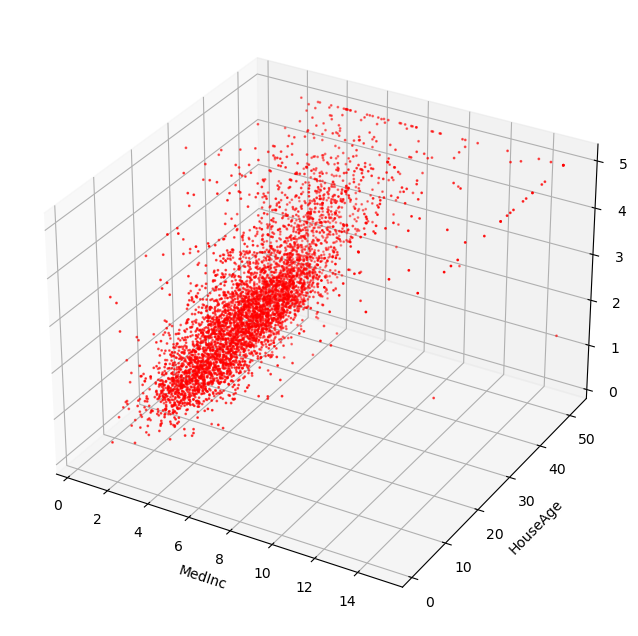

In [14]:
# Create a new figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Sample some points from the dataset to make the visualization more sparse
vis_df = train_df.sample(5000)

# Plot the chosen points in the 3D space
ax.scatter(vis_df['MedInc'], vis_df['HouseAge'], vis_df['HousePrice'], s=1, c='red')

ax.set_xlabel("MedInc")
ax.set_ylabel("HouseAge")
ax.set_zlabel("HousePrice")

plt.show()

### Train and evaluate the new model

In [15]:
# Train the model
reg_model.fit(x_train, y_train)

LinearRegression()

In [16]:
y_pred_test = reg_model.predict(x_test)
y_pred_train = reg_model.predict(x_train)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)

print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)

Train RMSE: 0.8098206523249448
Test RMSE: 0.8031165771559415


As can be seen, adding the new features gives a slight increase in performance. Unfortunately, the model still performs badly.

### Visualize the hyperplane

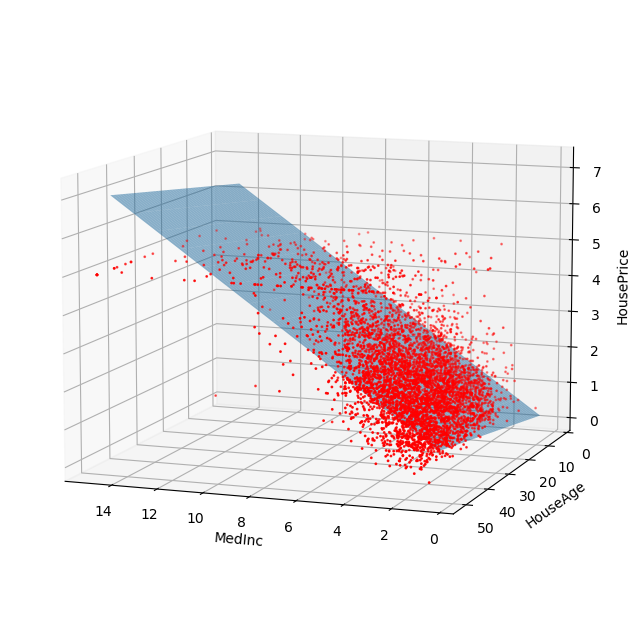

In [17]:
# Create a new figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Sample some points from the dataset to make the visualization more sparse
vis_df = train_df.sample(5000)

# Plot the chosen points in the 3D spcae
ax.scatter(vis_df['MedInc'], vis_df['HouseAge'], vis_df['HousePrice'], s=1, c='red')

# Obtain coefficients from the linear classifier
coef = reg_model.coef_
intercept = reg_model.intercept_

# Obtain the range across the hyperplane should span
x_range = np.arange(vis_df['MedInc'].min(), vis_df['MedInc'].max())
y_range = np.arange(vis_df['HouseAge'].min(), vis_df['HouseAge'].max())

# Draw hyperplane
xx, yy = np.meshgrid(x_range, y_range)

zz = coef[0, 0]*xx + coef[0, 1]*yy + intercept
ax.plot_surface(xx, yy, zz, alpha=0.5)

ax.set_xlabel("MedInc")
ax.set_ylabel("HouseAge")
ax.set_zlabel("HousePrice")

# Rotate the view to better see the hyperplane
ax.view_init(elev=10, azim=110, roll=0)

plt.show()